In [1]:
from sklearn.metrics import accuracy_score
import pandas as pd 
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\Data-Analysis-and-Visualization-of-Heart-Diseases\csv\Framingham_prediction.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [3]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(3658, 16)

In [6]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [7]:
cate_val = []
cont_val = []
for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [8]:
cate_val

['male',
 'education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [9]:
cont_val

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [10]:
cate_val.remove('TenYearCHD')
cate_val.remove('male')
edu=['education']
df = pd.get_dummies(df,columns = edu,drop_first=True)

In [11]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_2.0,education_3.0,education_4.0
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,1
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,1,0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,0,0,0
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,0,1,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0,1,0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0,0,1,0


In [12]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
df[cont_val] = st.fit_transform(df[cont_val])


In [13]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_2.0,education_3.0,education_4.0
0,1,-1.232580,0,-0.757169,0.0,0,0,0,-0.949108,-1.194111,-1.078881,0.292050,0.356370,-0.203044,0,0,0,1
1,0,-0.414905,0,-0.757169,0.0,0,0,0,0.298294,-0.514881,-0.160118,0.725010,1.608469,-0.244883,0,1,0,0
2,1,-0.181283,1,0.920689,0.0,0,0,0,0.184894,-0.220548,-0.243642,-0.108929,-0.060996,-0.495920,0,0,0,0
3,0,1.337256,1,1.759618,0.0,0,1,0,-0.268707,0.798296,1.009217,0.688110,-0.895729,0.884782,1,0,1,0
4,0,-0.414905,1,1.172368,0.0,0,0,0,1.092095,-0.107344,0.090454,-0.659969,0.773736,0.131672,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,0.052338,1,-0.673276,0.0,0,1,0,1.727136,2.111473,0.758645,0.046051,-0.812255,0.173511,1,0,0,0
4234,1,0.169149,1,2.850225,0.0,0,0,0,-0.676947,-0.265830,-0.243642,-1.493908,-0.895729,-0.579599,0,0,1,0
4237,0,0.285960,0,-0.757169,0.0,0,0,0,0.729214,0.051143,0.006930,-1.060948,0.356370,1.052139,0,1,0,0
4238,1,-1.115769,0,-0.757169,0.0,0,1,0,-1.175908,0.390758,1.259788,-0.044969,-0.728782,-0.412241,0,0,1,0


In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred1 = log.predict(X_test)
f1_score(y_test,y_pred1)


0.14705882352941174

In [16]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)
z=f1_score(y_test,y_pred2)
z


0.032

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)
accuracy_score(y_test,y_pred3)
f1_score(y_test,y_pred3)

0.12328767123287672

In [18]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(f1_score(y_test,y_pred))
    

In [19]:
score

[0.26548672566371684,
 0.09929078014184396,
 0.18404907975460122,
 0.07352941176470587,
 0.12328767123287672,
 0.09090909090909091,
 0.18571428571428572,
 0.0923076923076923,
 0.14814814814814814,
 0.031746031746031744,
 0.09090909090909091,
 0.046875,
 0.09090909090909091,
 0.031496062992125984,
 0.07633587786259541,
 0.046875,
 0.061538461538461535,
 0.015748031496062992,
 0.061538461538461535,
 0.016,
 0.09090909090909091,
 0.031496062992125984,
 0.046875,
 0.032,
 0.031746031746031744,
 0.016129032258064516,
 0.032,
 0.016260162601626018,
 0.016129032258064516,
 0.016129032258064516,
 0.032,
 0.0,
 0.016129032258064516,
 0.0,
 0.016129032258064516,
 0.0,
 0.0,
 0.0,
 0.0]

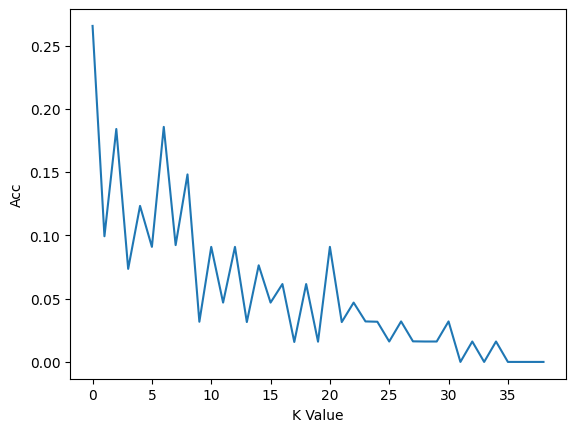

In [20]:
import matplotlib.pyplot as plt
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [21]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
f1_score(y_test,y_pred)

0.09929078014184396

In [22]:
dt=pd.read_csv(r"C:\Users\Lenovo\Desktop\Data-Analysis-and-Visualization-of-Heart-Diseases\csv\Framingham_prediction.csv")

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred4= dt.predict(X_test)
accuracy_score(y_test,y_pred4)
f1_score(y_test,y_pred4)


0.20689655172413796

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred5= rf.predict(X_test)
accuracy_score(y_test,y_pred5)
f1_score(y_test,y_pred5)


0.0923076923076923

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred6 = gbc.predict(X_test)
accuracy_score(y_test,y_pred6)
f1_score(y_test,y_pred6)



0.11594202898550726

In [26]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [27]:
final_data

,Models,ACC
0,LR,84.153005
1,SVM,83.469945
2,KNN,82.513661
3,DT,74.863388
4,RF,83.879781
5,GB,83.333333


In [28]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[f1_score(y_test,y_pred1)*100,
                                f1_score(y_test,y_pred2)*100,
                                f1_score(y_test,y_pred3)*100,
                                f1_score(y_test,y_pred4)*100,
                                f1_score(y_test,y_pred5)*100,
                                f1_score(y_test,y_pred6)*100]})

In [29]:
final_data

,Models,ACC
0,LR,14.705882
1,SVM,3.200000
2,KNN,12.328767
3,DT,20.689655
4,RF,9.230769
5,GB,11.594203
